# MÜŞTERİ SEGMENTASYONU PROJESİ




In [2]:
import numpy
import os

os.environ["OMP_NUM_THREADS"] = "1"

In [3]:

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

df = pd.read_csv("Avm_Musterileri.csv")
df.head()


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\kadir\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\kadir\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "c:\Users\kadir\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
    self.io_loop.start()
  File "c:\Users\kadir\anaconda3\Lib\site-packa

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\kadir\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\kadir\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "c:\Users\kadir\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
    self.io_loop.start()
  File "c:\Users\kadir\anaconda3\Lib\site-packa

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\kadir\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\kadir\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "c:\Users\kadir\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
    self.io_loop.start()
  File "c:\Users\kadir\anaconda3\Lib\site-packa

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\kadir\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\kadir\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "c:\Users\kadir\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
    self.io_loop.start()
  File "c:\Users\kadir\anaconda3\Lib\site-packa

AttributeError: _ARRAY_API not found

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


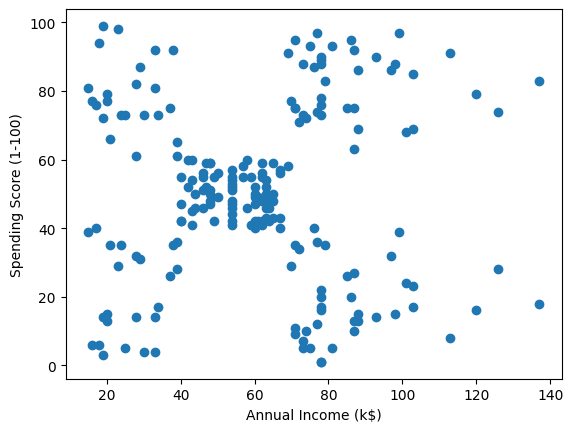

In [4]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Veri setimize bir göz atalım:

In [5]:
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


In [6]:
# Bazı sütun isimleri çok uzun onları kısaltalım:
df.rename(columns = {'Annual Income (k$)':'income'}, inplace = True)
df.rename(columns = {'Spending Score (1-100)':'score'}, inplace = True)

In [7]:
df.head()

,CustomerID,income,score
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


### Unutmayın modelinize verileri basmadan önce mutlaka verilerinizi normalize etmelisiniz !

In [8]:
#Normalize işlemini MinMaxScaler() fonksiyonunu kullanarak yapacagız:

scaler = MinMaxScaler()

scaler.fit(df[['income']])
df['income'] = scaler.transform(df[['income']])

scaler.fit(df[['score']])
df['score'] = scaler.transform(df[['score']])

df.head()

,CustomerID,income,score
0,1,0.000000,0.387755
1,2,0.000000,0.816327
2,3,0.008197,0.051020
3,4,0.008197,0.775510
4,5,0.016393,0.397959


In [9]:
df.tail()

,CustomerID,income,score
195,196,0.860656,0.795918
196,197,0.909836,0.275510
197,198,0.909836,0.744898
198,199,1.000000,0.173469
199,200,1.000000,0.836735


### Önce K Değerini Belirleyelim (Elbow Yöntemi kullanarak)

In [10]:
k_range = range(1,11)

list_dist = []

for k in k_range:
    kmeans_modelim = KMeans(n_clusters=k)
    kmeans_modelim.fit(df[['income','score']])
    list_dist.append(kmeans_modelim.inertia_)

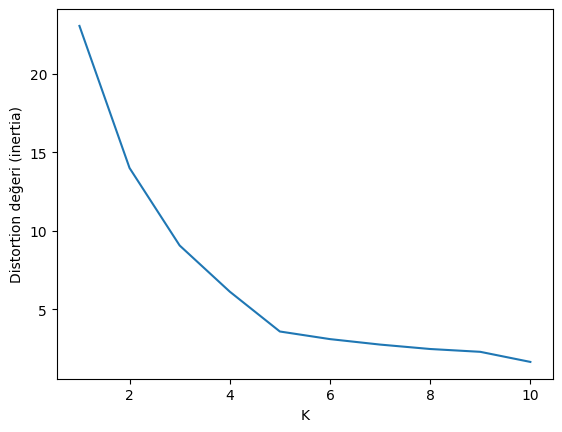

In [ ]:
plt.xlabel('K')
plt.ylabel('Distortion değeri (inertia)')
plt.plot(k_range,list_dist)
plt.show()

#### En iyi K değeri = 5

In [12]:
# K = 5 için bir K-Means modeli oluşturalım:
kmeans_modelim = KMeans(n_clusters = 5)
y_predicted = kmeans_modelim.fit_predict(df[['income','score']])
y_predicted

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4, 4,
       3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 2, 4, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [13]:
df['cluster'] = y_predicted
df.head()

,CustomerID,income,score,cluster
0,1,0.000000,0.387755,3
1,2,0.000000,0.816327,1
2,3,0.008197,0.051020,3
3,4,0.008197,0.775510,1
4,5,0.016393,0.397959,3


In [14]:
# Centroidleri görelim:
kmeans_modelim.cluster_centers_   

array([[0.59631148, 0.16921769],
       [0.08792846, 0.79962894],
       [0.58638083, 0.82783883],
       [0.08792846, 0.19619666],
       [0.32695811, 0.49533888]])

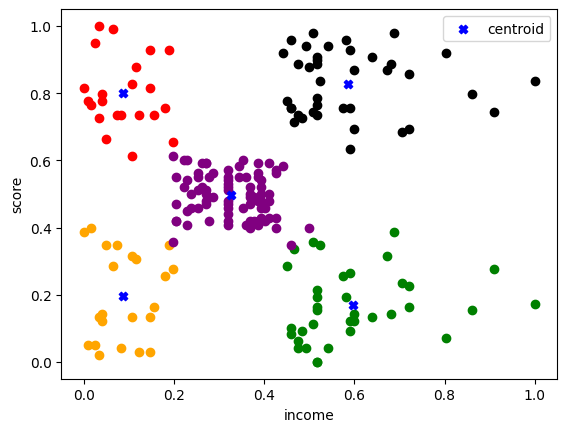

In [15]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]


plt.xlabel('income')
plt.ylabel('score')
plt.scatter(df1['income'],df1['score'],color='green')
plt.scatter(df2['income'],df2['score'],color='red')
plt.scatter(df3['income'],df3['score'],color='black')
plt.scatter(df4['income'],df4['score'],color='orange')
plt.scatter(df5['income'],df5['score'],color='purple')



# kmeans_modelim.cluster_centers_ numpy 2 boyutlu array olduğu için x ve y sütunlarını kmeans_modelim.cluster_centers_[:,0] 
# ve kmeans_modelim.cluster_centers_[:,1] şeklinde scatter plot için alıyoruz:
plt.scatter(kmeans_modelim.cluster_centers_[:,0], kmeans_modelim.cluster_centers_[:,1], color='blue', marker='X', label='centroid')
plt.legend()
plt.show()

